In [1]:
import evaluate_feature as ev
import numpy as np

In [2]:
embs = np.load("../../data/layer_11_embeddings_30subset.npy")
binding_sites = np.load("../../data/chip_exo_57_TF_binding_sites_30subset.npy")

In [3]:
flat_embs = embs.reshape(-1, embs.shape[-1])
print(flat_embs.shape)
flat_sites = binding_sites.reshape(-1, binding_sites.shape[-1])
print(flat_sites.shape)

(1977916, 768)
(1977916, 58)


In [4]:
np.sum(flat_sites, axis=0)

array([ 4102,    18,   185,    85,    81,   211,   596,    10,    36,
          80,    18,   130,  1829,    34,   181,    20,   103,    14,
         758,    95,   174,   255,    48,   235,  1609,    78,   111,
         201,   300,   306,   241,   255,    30,   280,  2241,     0,
        3378,   204,    47,    48,   307,   236,   159,   421,   284,
         157,    81,   136,   142,   677,   167,    72,  1031,   154,
           0,   220,    65, 21785])

In [5]:
print(np.shape(flat_embs))
print(np.shape(flat_sites[:,[-1]]))

(1977916, 768)
(1977916, 1)


In [6]:
import importlib
importlib.reload(ev)

<module 'evaluate_feature' from '/Users/Helena/Desktop/Master_fächer/MLRegGen/ml4rg-SAEs/src/evaluate_feature.py'>

In [7]:
%load_ext rich

In [8]:
precision_matrix = ev.calculate_precision_matrix(flat_embs, flat_sites[:,[-1]])

Output()

In [9]:
AUC_matrix = ev.calculate_AUC_matrix(flat_embs, flat_sites[:,[-1]])

Output()

In [10]:
import pandas as pd
results = pd.DataFrame({"AUC":AUC_matrix[:,0], "precision":precision_matrix[:,0]})

<Axes: xlabel='AUC', ylabel='precision'>

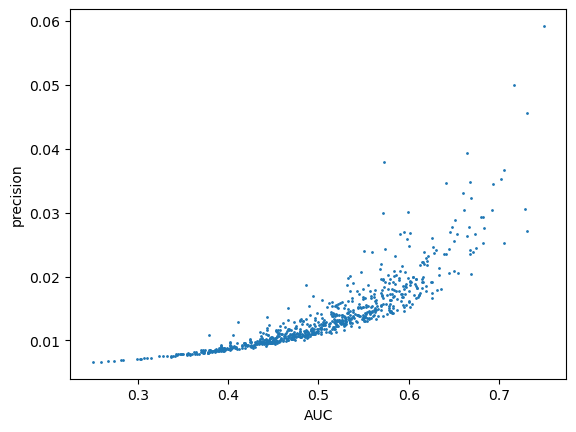

In [11]:
results.plot.scatter("AUC", "precision", s=1)

While there are a few features with AUCs higher than 0.7, all of them have a very bad precision. => AUC doesn't actually necessarily indicate quality, because the truth matrix is so sparse.